<a href="https://colab.research.google.com/github/kiranch97/Projects-ML/blob/main/Hospital_LOS_Prediction_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [ ]:
data = pd.read_csv('/content/healthcare_data.csv')

In [ ]:
same_data = data.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33719 entries, 0 to 33718
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Available Extra Rooms in Hospital  33719 non-null  int64  
 1   Department                         33719 non-null  object 
 2   Ward_Facility_Code                 33719 non-null  object 
 3   doctor_name                        33719 non-null  object 
 4   staff_available                    33719 non-null  int64  
 5   patientid                          33719 non-null  int64  
 6   Age                                33719 non-null  object 
 7   gender                             33719 non-null  object 
 8   Type of Admission                  33719 non-null  object 
 9   Severity of Illness                33719 non-null  object 
 10  health_conditions                  26099 non-null  object 
 11  Visitors with Patient              33719 non-null  int

In [ ]:
data.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8.0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9.0
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7.0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,NaN,4,No,4814.149231,8.0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34.0


In [ ]:
data.tail()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
33714,4,gynecology,F,Dr Olivia,4,96208,31-40,Female,Trauma,Moderate,Other,2,Yes,4202.445807,7.0
33715,7,anesthesia,E,Dr Mark,3,110311,81-90,Male,Trauma,Moderate,Heart disease,2,Yes,4747.258505,29.0
33716,5,gynecology,F,Dr Sophia,6,80303,21-30,Female,Trauma,Minor,Diabetes,4,Yes,4244.657018,7.0
33717,4,gynecology,B,Dr Sophia,7,3918,31-40,Female,Trauma,Extreme,Heart disease,2,Yes,4941.196292,8.0
33718,24,gynecology,F,Dr Nathan,7,54220,41-50,Female,Trauma,Extreme,NaN,9,Yes,4674.160577,NaN


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,33719.0,3.652303,2.714621,0.000000,2.000000,3.000000,4.000000,24.000000
staff_available,33719.0,5.043863,3.160543,0.000000,2.000000,5.000000,8.000000,10.000000
patientid,33719.0,62905.817047,41603.674491,-3146.000000,25435.000000,57265.000000,102763.000000,134163.000000
Visitors with Patient,33719.0,3.547762,2.238407,0.000000,2.000000,3.000000,4.000000,32.000000
Admission_Deposit,33719.0,4725.974200,1047.906209,1776.898276,4071.825522,4632.359356,5096.420558,9451.389018
Stay (in days),33718.0,12.390800,7.902473,4.000000,8.000000,9.000000,11.000000,48.000000


In [ ]:
data.shape

(33719, 15)

In [ ]:
data.isnull().sum()

Available Extra Rooms in Hospital       0
Department                              0
Ward_Facility_Code                      0
doctor_name                             0
staff_available                         0
patientid                               0
Age                                     0
gender                                  0
Type of Admission                       0
Severity of Illness                     0
health_conditions                    7620
Visitors with Patient                   0
Insurance                               0
Admission_Deposit                       0
Stay (in days)                          1
dtype: int64

In [ ]:
print(data.isnull().any(axis=1))

0        False
1        False
2        False
3         True
4        False
         ...  
33714    False
33715    False
33716    False
33717    False
33718     True
Length: 33719, dtype: bool


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.dtypes

Available Extra Rooms in Hospital      int64
Department                            object
Ward_Facility_Code                    object
doctor_name                           object
staff_available                        int64
Age                                   object
gender                                object
Type of Admission                     object
Severity of Illness                   object
health_conditions                     object
Visitors with Patient                  int64
Insurance                             object
Admission_Deposit                    float64
Stay (in days)                       float64
dtype: object

In [ ]:
data['patientid'].value_counts()

patientid
3675      5
47472     5
69017     4
128120    4
33874     4
         ..
44708     1
23532     1
32940     1
100221    1
54220     1
Name: count, Length: 29231, dtype: int64

In [ ]:
data = data.drop(columns='patientid')

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,33719.0,3.652303,2.714621,0.000000,2.000000,3.000000,4.000000,24.000000
staff_available,33719.0,5.043863,3.160543,0.000000,2.000000,5.000000,8.000000,10.000000
Visitors with Patient,33719.0,3.547762,2.238407,0.000000,2.000000,3.000000,4.000000,32.000000
Admission_Deposit,33719.0,4725.974200,1047.906209,1776.898276,4071.825522,4632.359356,5096.420558,9451.389018
Stay (in days),33718.0,12.390800,7.902473,4.000000,8.000000,9.000000,11.000000,48.000000


In [ ]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

In [ ]:
num_cols = [col for col in data.columns if data[col].dtype != 'object']

In [ ]:
for i in cat_cols:
    print(i,":", len(data[i].unique()))

Department : 5
Ward_Facility_Code : 6
doctor_name : 9
Age : 10
gender : 3
Type of Admission : 3
Severity of Illness : 3
health_conditions : 6
Insurance : 2


In [ ]:
for i in num_cols:
    print(i, ":", len(data[i].unique()))

Available Extra Rooms in Hospital : 18
staff_available : 11
Visitors with Patient : 28
Admission_Deposit : 33717
Stay (in days) : 46


In [ ]:
for i in cat_cols:
    print(data[i].value_counts(normalize=True))
    print("="*50)

Department
gynecology            0.685993
radiotherapy          0.169370
anesthesia            0.089593
TB & Chest disease    0.045286
surgery               0.009757
Name: proportion, dtype: float64
Ward_Facility_Code
F    0.243691
D    0.236247
B    0.206056
E    0.190308
A    0.094279
C    0.029420
Name: proportion, dtype: float64
doctor_name
Dr Sophia    0.253003
Dr Olivia    0.184851
Dr Sam       0.166078
Dr Mark      0.132774
Dr Nathan    0.132388
Dr Sarah     0.115751
Dr Isaac     0.009490
Dr John      0.005398
Dr Simon     0.000267
Name: proportion, dtype: float64
Age
31-40     0.339986
21-30     0.281414
41-50     0.163202
11-20     0.055666
61-70     0.053056
51-60     0.042943
71-80     0.036952
81-90     0.016549
0-10      0.007029
91-100    0.003203
Name: proportion, dtype: float64
gender
Female    0.689759
Male      0.308342
Other     0.001898
Name: proportion, dtype: float64
Type of Admission
Trauma       0.618227
Emergency    0.274267
Urgent       0.107506
Name: proporti

In [ ]:
from contextlib import nullcontext
for i in num_cols:
    print(i, data[i].isnull().sum())

Available Extra Rooms in Hospital 0
staff_available 0
Visitors with Patient 0
Admission_Deposit 0
Stay (in days) 1


### ***# Univariate Analysis***

In [ ]:
def histogram_boxpolt(data, feature, figsize=(7,6), kde=True, bins=None):
    import matplotlib.pyplot as plt
    figure, (ax_box, ax_hist ) = plt.subplots(2, sharex=True, figsize=figsize)
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans = True, color = 'violet')

    if bins == None:
      sns.histplot(data=data, x=feature, ax=ax_hist)
    else:
      sns.histplot(data=data, x=feature, ax=ax_hist, kde=kde, bins=bins)

    ax_hist.axvline(data[feature].mean(), color='red', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='green', linestyle='-')

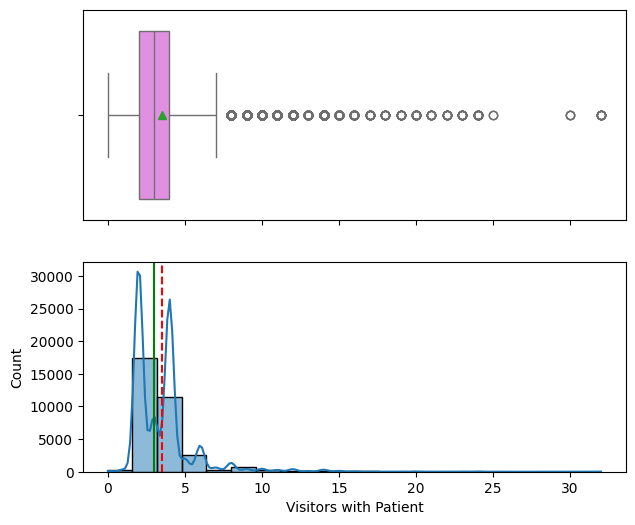

In [ ]:
histogram_boxpolt(data, 'Visitors with Patient', bins=20)

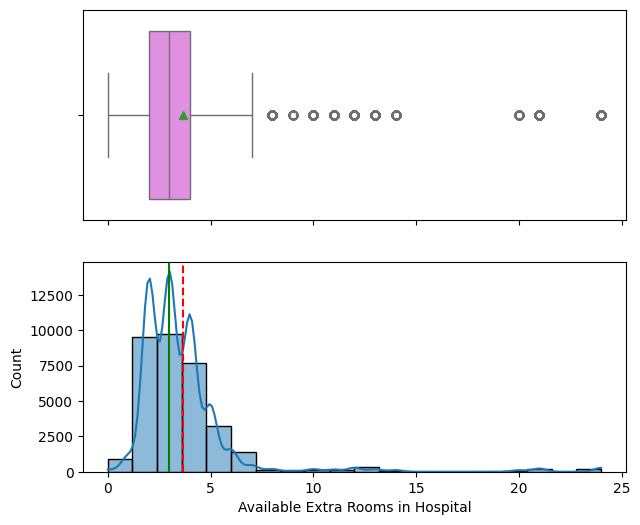

In [ ]:
histogram_boxpolt(data, 'Available Extra Rooms in Hospital', bins=20)

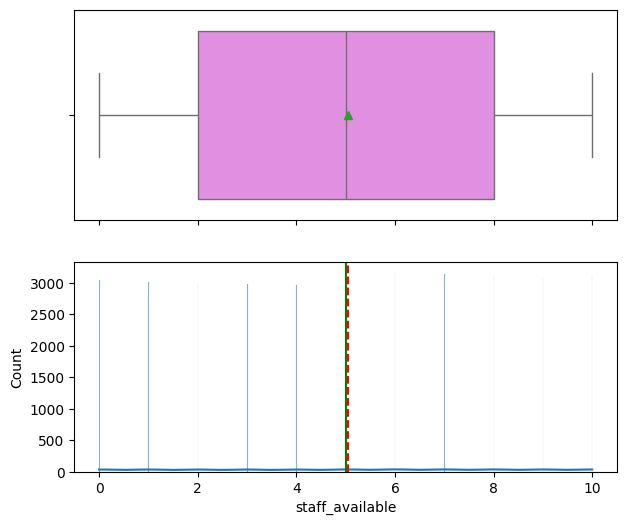

In [ ]:
histogram_boxpolt(data, 'staff_available', bins=1000)

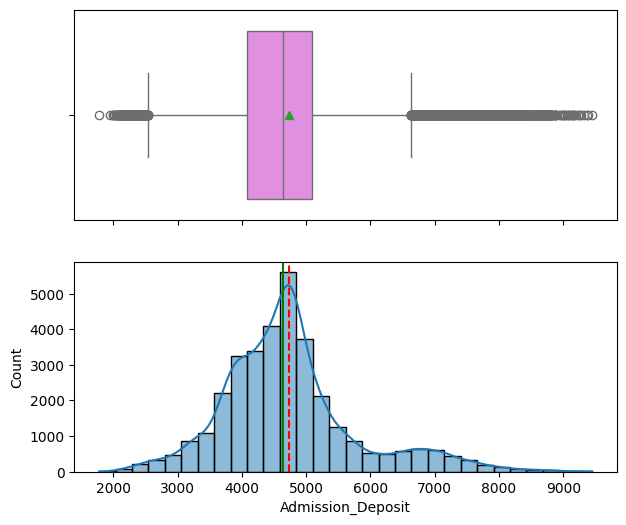

In [ ]:
histogram_boxpolt(data, 'Admission_Deposit', bins=30)

## ***## Bivariant Analysis***

In [ ]:
data[num_cols].corr()

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days)
Available Extra Rooms in Hospital,1.000000,-0.001482,0.069961,-0.053674,-0.029696
staff_available,-0.001482,1.000000,0.011645,-0.004708,0.000170
Visitors with Patient,0.069961,0.011645,1.000000,-0.065352,0.035168
Admission_Deposit,-0.053674,-0.004708,-0.065352,1.000000,0.036819
Stay (in days),-0.029696,0.000170,0.035168,0.036819,1.000000


In [ ]:
data2 = data[num_cols].copy()

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33719 entries, 0 to 33718
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Available Extra Rooms in Hospital  33719 non-null  int64  
 1   staff_available                    33719 non-null  int64  
 2   Visitors with Patient              33719 non-null  int64  
 3   Admission_Deposit                  33719 non-null  float64
 4   Stay (in days)                     33718 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 1.3 MB


<Axes: >

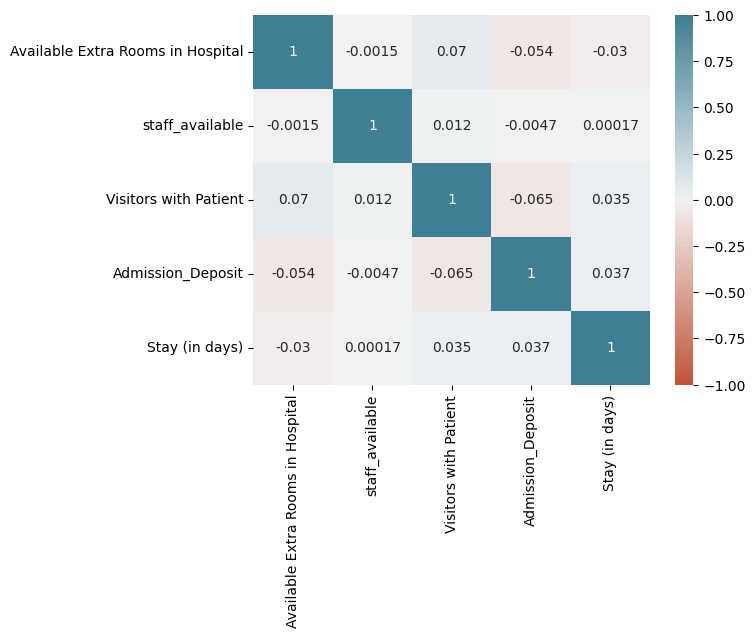

In [ ]:
sns.heatmap(data2.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

## ***Categorical Variable***

In [ ]:
data3 = data[cat_cols].copy()

<Axes: xlabel='Stay (in days)', ylabel='Ward_Facility_Code'>

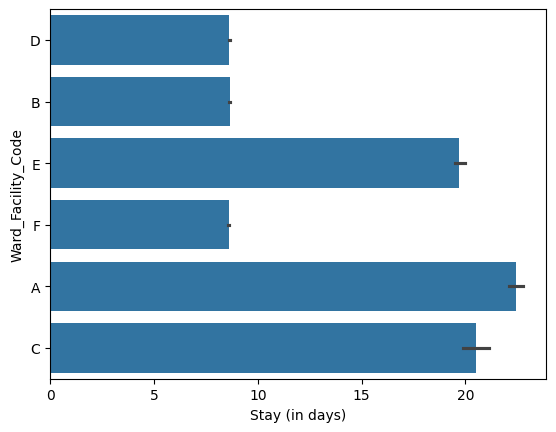

In [ ]:
sns.barplot(x='Stay (in days)', y='Ward_Facility_Code', data=data)

In [ ]:
import matplotlib.pyplot as plt
from inspect import FrameInfo
def stacked_barplot(data, predictor, target):
  count = data[predictor].nunique()
  sorter = data[target].value_counts().index[-1]
  tab1 = pd.crosstab(data[predictor], data[target]).sort_values(by=sorter, ascending=False)
  print(tab1)

  tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)
  tab.plot(kind='bar', stacked=True, figsize=(count+1, 5))
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon = False)
#  sns.boxplot(x=predictor, y=target, data=data, order=data[predictor].unique())

Department          TB & Chest disease  anesthesia  gynecology  radiotherapy  surgery
Ward_Facility_Code                                                                   
A                                  320        1112           0          1418      329
B                                    0           0        6948             0        0
C                                   89         286           0           617        0
D                                    0           0        7966             0        0
E                                 1118        1623           0          3676        0
F                                    0           0        8217             0        0


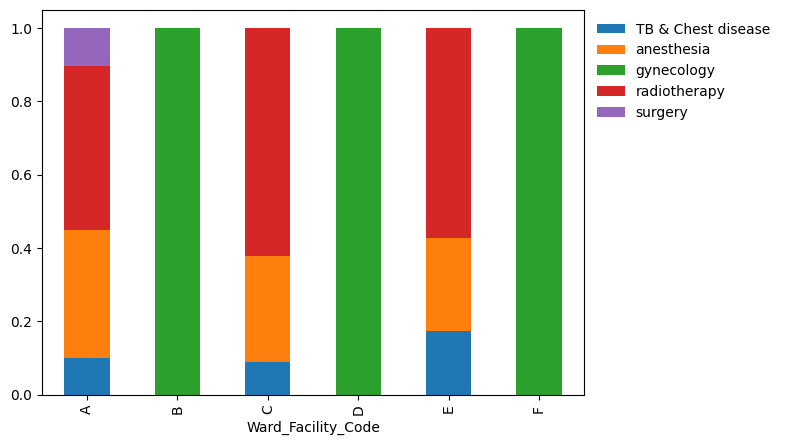

In [ ]:
stacked_barplot(data, 'Ward_Facility_Code', 'Department')

Severity of Illness  Extreme  Minor  Moderate
Ward_Facility_Code                           
D                       2160   1585      4221
B                        753   1839      4356
E                        479   1484      4454
F                        417   3198      4602
A                        401    681      2097
C                        276    158       558


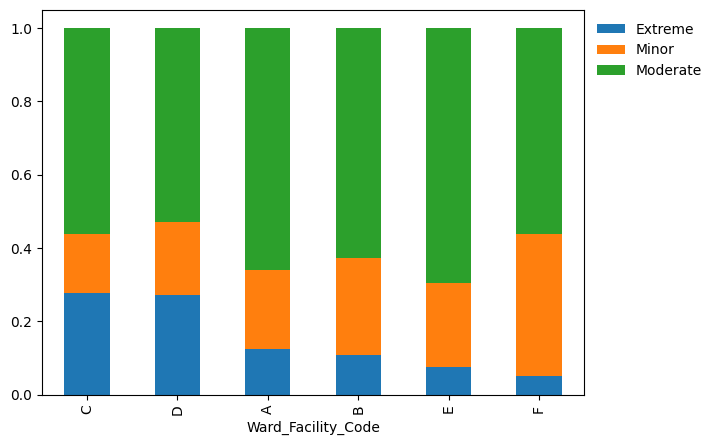

In [ ]:
stacked_barplot(data, 'Ward_Facility_Code', 'Severity of Illness')

<Axes: xlabel='Stay (in days)', ylabel='Age'>

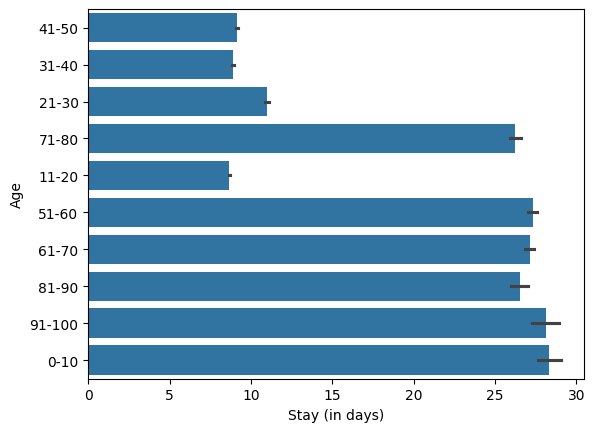

In [ ]:
sns.barplot(y='Age', x='Stay (in days)', data=data)

Severity of Illness  Extreme  Minor  Moderate
Age                                          
31-40                   1510   3173      6781
21-30                   1398   2676      5415
41-50                    797   1476      3230
61-70                    219    371      1199
11-20                    171    578      1128
51-60                    158    245      1045
71-80                    157    222       867
81-90                     34     99       425
0-10                      27     77       133
91-100                    15     28        65


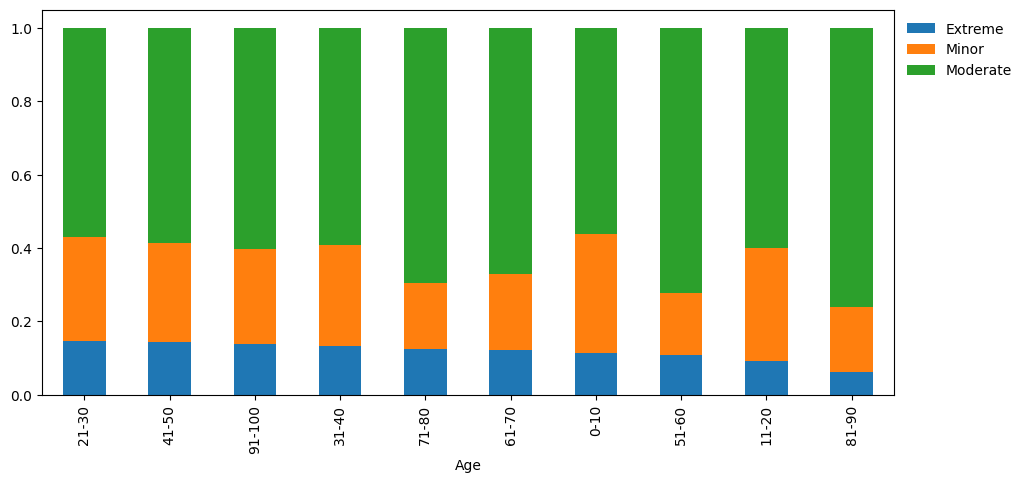

In [ ]:
stacked_barplot(data, 'Age', 'Severity of Illness')

<Axes: xlabel='Stay (in days)', ylabel='Department'>

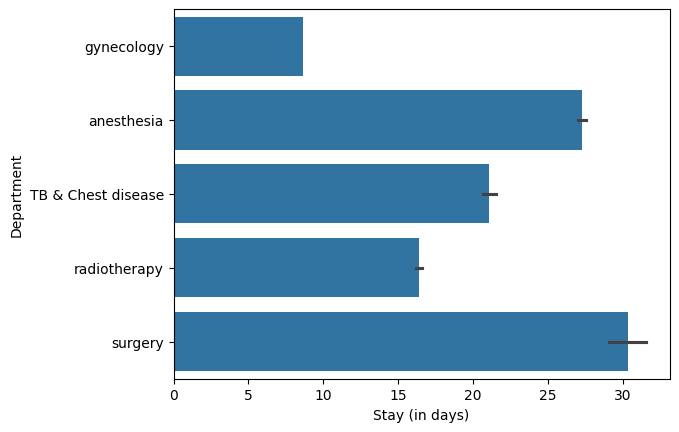

In [ ]:
sns.barplot(y='Department', x='Stay (in days)', data=data)

In [ ]:
data.groupby(['doctor_name'])['Department'].count()

doctor_name
Dr Isaac      320
Dr John       182
Dr Mark      4477
Dr Nathan    4464
Dr Olivia    6233
Dr Sam       5600
Dr Sarah     3903
Dr Simon        9
Dr Sophia    8531
Name: Department, dtype: int64

## **## Model Building**

In [ ]:
#Encode the categorial objects:

data = pd.get_dummies(
    data,
    columns=data.select_dtypes(include=['object', 'category']).columns.tolist(),drop_first=True
)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33719 entries, 0 to 33718
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Available Extra Rooms in Hospital      33719 non-null  int64  
 1   staff_available                        33719 non-null  int64  
 2   Visitors with Patient                  33719 non-null  int64  
 3   Admission_Deposit                      33719 non-null  float64
 4   Stay (in days)                         33718 non-null  float64
 5   Department_anesthesia                  33719 non-null  bool   
 6   Department_gynecology                  33719 non-null  bool   
 7   Department_radiotherapy                33719 non-null  bool   
 8   Department_surgery                     33719 non-null  bool   
 9   Ward_Facility_Code_B                   33719 non-null  bool   
 10  Ward_Facility_Code_C                   33719 non-null  bool   
 11  Wa

In [ ]:
data.head()

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,doctor_name_Dr John,doctor_name_Dr Mark,doctor_name_Dr Nathan,doctor_name_Dr Olivia,doctor_name_Dr Sam,doctor_name_Dr Sarah,doctor_name_Dr Simon,doctor_name_Dr Sophia,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,gender_Male,gender_Other,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_Other,Insurance_Yes
0,4,0,4,2966.408696,8.0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
1,4,2,2,3554.835677,9.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False
2,2,8,2,5624.733654,7.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
3,4,7,4,4814.149231,8.0,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4,2,10,2,5169.269637,34.0,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,False


In [ ]:
X = data.drop(columns='Stay (in days)', axis=1)
y = data['Stay (in days)']

In [ ]:
X.shape

(33719, 41)

In [ ]:
y

0         8.0
1         9.0
2         7.0
3         8.0
4        34.0
         ... 
33714     7.0
33715    29.0
33716     7.0
33717     8.0
33718     NaN
Name: Stay (in days), Length: 33719, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
X_test.shape, X_train.shape

((6744, 41), (26975, 41))

In [ ]:
def adj_r2_score(predictors, target, predictions):
  r2 = r2_score(target, predictions)
  n = X_train.shape[0]
  k = X_train.shape[1]
  return 1 - (1-r2)*(n-1)/(n-k-1)

In [ ]:
def mape_score(target, predictions):
  return np.mean(np.abs((target - predictions) / target)) * 100


In [ ]:
def model_performance_regression(model, predictors, target):
  pred = model.predict(predictors)
  r2 = r2_score(target, pred)
  rmse = np.sqrt(mean_squared_error(target, pred))
  adjr2 = adj_r2_score(predictors, target, pred)
  mae = mean_absolute_error(target, pred)
  mape = mape_score(target, pred)

  df_pref = pd.DataFrame(
      {
        "Roor Mean Square Error": rmse,
        "R-Squared": r2,
        "Adjusted R-Squared": adjr2,
        "Mean Absolute Error": mae,
        "Mean Absolute Percentage Error": mape
      },
      index=[0]
  )
  return df_pref

In [ ]:
# Check for NaN values in y_train
nan_indices = np.where(pd.isna(y_train))[0]
print(f"Indices with NaN values: {nan_indices}")
print(f"Number of NaN values: {len(nan_indices)}")

Indices with NaN values: [24568]
Number of NaN values: 1


In [ ]:
# Check for NaN values in X_train
nan_indices = np.where(pd.isna(y_test))[0]
print(f"Indices with NaN values: {nan_indices}")
print(f"Number of NaN values: {len(nan_indices)}")

Indices with NaN values: []
Number of NaN values: 0


In [ ]:
# Impute missing values with the median
y_train_imputed = y_train.fillna(y_train.median())
y_test_imputed = y_test.fillna

In [ ]:
# Impute missing values with the median
X_train_imputed = X_train.fillna(X_train.median())

In [ ]:
dt_regressor = DecisionTreeRegressor(random_state=1)
dt_regressor.fit(X_train_imputed, y_train_imputed)

DecisionTreeRegressor(random_state=1)

In [ ]:
dt_regressor_perf_test = model_performance_regression(dt_regressor, X_test, y_test)
dt_regressor_perf_test

,Roor Mean Square Error,R-Squared,Adjusted R-Squared,Mean Absolute Error,Mean Absolute Percentage Error
0,2.165765,0.923841,0.923725,1.402284,11.712914


In [ ]:
from sklearn import tree

In [ ]:
features  = list(X.columns)
features

['Available Extra Rooms in Hospital',
 'staff_available',
 'Visitors with Patient',
 'Admission_Deposit',
 'Department_anesthesia',
 'Department_gynecology',
 'Department_radiotherapy',
 'Department_surgery',
 'Ward_Facility_Code_B',
 'Ward_Facility_Code_C',
 'Ward_Facility_Code_D',
 'Ward_Facility_Code_E',
 'Ward_Facility_Code_F',
 'doctor_name_Dr John',
 'doctor_name_Dr Mark',
 'doctor_name_Dr Nathan',
 'doctor_name_Dr Olivia',
 'doctor_name_Dr Sam',
 'doctor_name_Dr Sarah',
 'doctor_name_Dr Simon',
 'doctor_name_Dr Sophia',
 'Age_11-20',
 'Age_21-30',
 'Age_31-40',
 'Age_41-50',
 'Age_51-60',
 'Age_61-70',
 'Age_71-80',
 'Age_81-90',
 'Age_91-100',
 'gender_Male',
 'gender_Other',
 'Type of Admission_Trauma',
 'Type of Admission_Urgent',
 'Severity of Illness_Minor',
 'Severity of Illness_Moderate',
 'health_conditions_Diabetes',
 'health_conditions_Heart disease',
 'health_conditions_High Blood Pressure',
 'health_conditions_Other',
 'Insurance_Yes']

In [ ]:
dt_regressor_visualize = DecisionTreeRegressor(random_state=1, max_depth=3)
dt_regressor_visualize.fit(X_train, y_train_imputed)

DecisionTreeRegressor(max_depth=3, random_state=1)

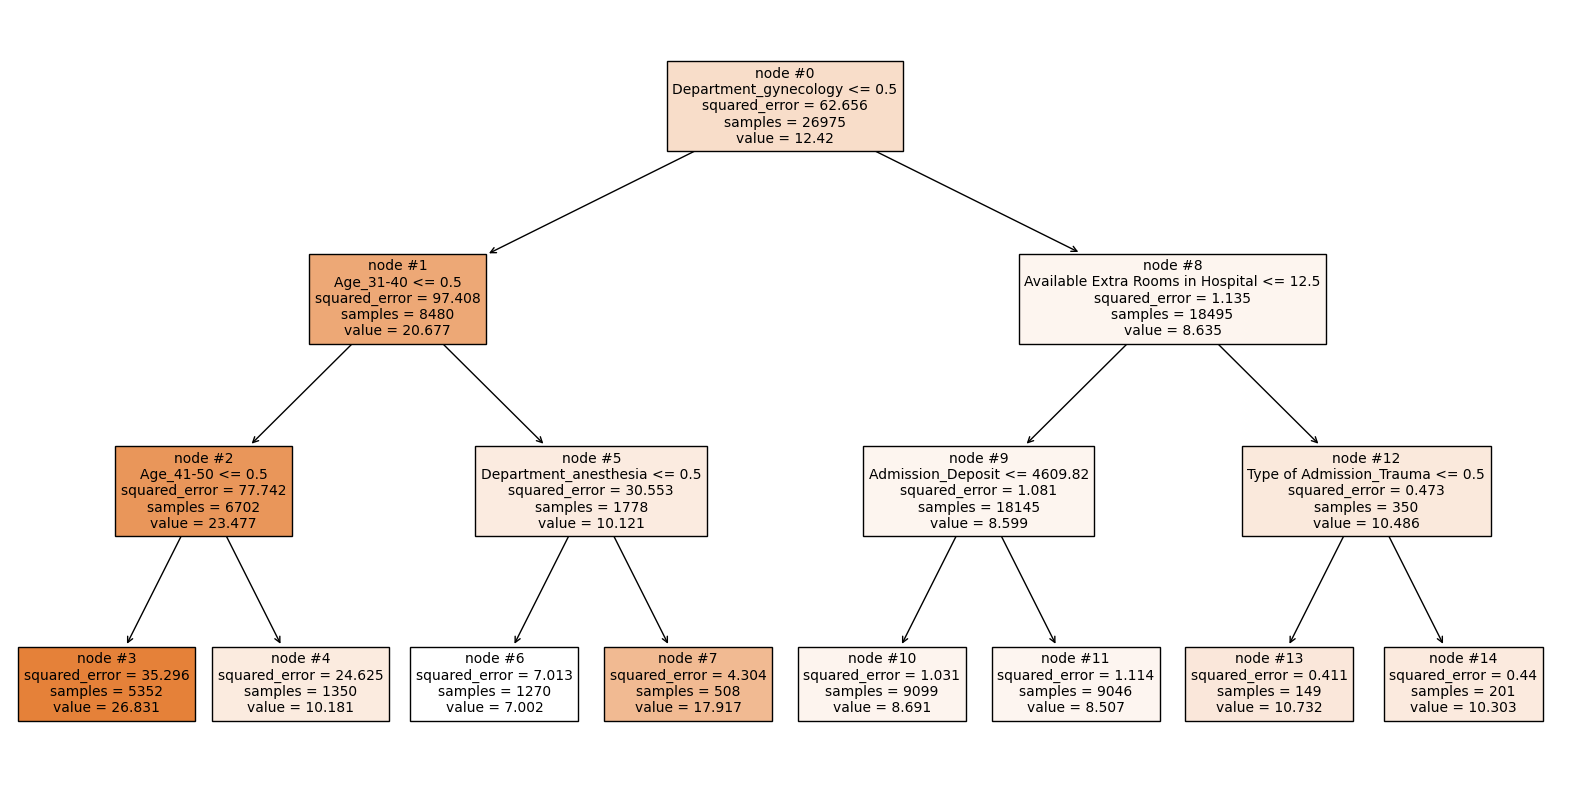

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_regressor_visualize, feature_names=features, filled=True, fontsize=10, node_ids=True)
plt.show()

In [ ]:
print(tree.export_text(dt_regressor_visualize, feature_names=features))

|--- Department_gynecology <= 0.50
|   |--- Age_31-40 <= 0.50
|   |   |--- Age_41-50 <= 0.50
|   |   |   |--- value: [26.83]
|   |   |--- Age_41-50 >  0.50
|   |   |   |--- value: [10.18]
|   |--- Age_31-40 >  0.50
|   |   |--- Department_anesthesia <= 0.50
|   |   |   |--- value: [7.00]
|   |   |--- Department_anesthesia >  0.50
|   |   |   |--- value: [17.92]
|--- Department_gynecology >  0.50
|   |--- Available Extra Rooms in Hospital <= 12.50
|   |   |--- Admission_Deposit <= 4609.82
|   |   |   |--- value: [8.69]
|   |   |--- Admission_Deposit >  4609.82
|   |   |   |--- value: [8.51]
|   |--- Available Extra Rooms in Hospital >  12.50
|   |   |--- Type of Admission_Trauma <= 0.50
|   |   |   |--- value: [10.73]
|   |   |--- Type of Admission_Trauma >  0.50
|   |   |   |--- value: [10.30]



In [ ]:
bg_regressor = BaggingRegressor(random_state=1)
bg_regressor.fit(X_train, y_train_imputed)

BaggingRegressor(random_state=1)

In [ ]:
bg_regressor_perf_test = model_performance_regression(bg_regressor, X_test, y_test)
bg_regressor_perf_test

,Roor Mean Square Error,R-Squared,Adjusted R-Squared,Mean Absolute Error,Mean Absolute Percentage Error
0,1.592425,0.958827,0.958764,1.072598,9.140911


In [ ]:
rf_regressor = RandomForestRegressor(random_state=1)
rf_regressor.fit(X_train, y_train_imputed)

RandomForestRegressor(random_state=1)

In [ ]:
rf_regressor_perf_test = model_performance_regression(rf_regressor, X_test, y_test)
rf_regressor_perf_test

,Roor Mean Square Error,R-Squared,Adjusted R-Squared,Mean Absolute Error,Mean Absolute Percentage Error
0,1.526647,0.962158,0.9621,1.025885,8.742929


In [ ]:
!pip install xgboost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada_regressor = AdaBoostRegressor(random_state=1)
ada_regressor.fit(X_train, y_train_imputed)

AdaBoostRegressor(random_state=1)

In [ ]:
ada_regressor_perf_test = model_performance_regression(ada_regressor, X_test, y_test)
ada_regressor_perf_test

,Roor Mean Square Error,R-Squared,Adjusted R-Squared,Mean Absolute Error,Mean Absolute Percentage Error
0,2.353205,0.910088,0.909951,1.602156,14.79303


In [ ]:
grandient_boost_estimator = GradientBoostingRegressor(random_state=1)
grandient_boost_estimator.fit(X_train, y_train_imputed)

GradientBoostingRegressor(random_state=1)

In [ ]:
grandient_boost_perf_test = model_performance_regression(grandient_boost_estimator, X_test, y_test)
grandient_boost_perf_test

,Roor Mean Square Error,R-Squared,Adjusted R-Squared,Mean Absolute Error,Mean Absolute Percentage Error
0,1.814717,0.946529,0.946448,1.222024,10.4508


In [ ]:
import xgboost as xgb

In [ ]:
xgb_regressor = xgb.XGBRegressor(random_state=1)
xgb_regressor.fit(X_train, y_train_imputed)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_regressor_perf_test = model_performance_regression(xgb_regressor, X_test, y_test)
xgb_regressor_perf_test

,Roor Mean Square Error,R-Squared,Adjusted R-Squared,Mean Absolute Error,Mean Absolute Percentage Error
0,1.646904,0.955961,0.955894,1.101117,9.39273


In [ ]:
grandient_boost = grandient_boost_estimator.predict(X_test)

In [ ]:
models_test_comp_df = pd.concat(
    [
        dt_regressor_perf_test.T,
        bg_regressor_perf_test.T,
        rf_regressor_perf_test.T,
        ada_regressor_perf_test.T,
        grandient_boost_perf_test.T,
        xgb_regressor_perf_test.T,
        rf_grid_perf_test.T
    ],
    axis=1
    )

In [ ]:
models_test_comp_df.T

,Roor Mean Square Error,R-Squared,Adjusted R-Squared,Mean Absolute Error,Mean Absolute Percentage Error
0,2.165765,0.923841,0.923725,1.402284,11.712914
0,1.592425,0.958827,0.958764,1.072598,9.140911
0,1.526647,0.962158,0.962100,1.025885,8.742929
0,2.353205,0.910088,0.909951,1.602156,14.793030
0,1.814717,0.946529,0.946448,1.222024,10.450800
0,1.646904,0.955961,0.955894,1.101117,9.392730
0,1.531471,0.961918,0.961860,1.027146,8.749991


In [ ]:
models_test_comp_df.columns = [
    'DecisionTree Regressor',
    'Bagging Regressor',
    'RandomForest Regressor',
    'AdaBoost Regressor',
    'GradientBoot Regressor',
    'XGBoot Regressor',
    'rf_grid_perf_test',
    ]

In [ ]:
models_test_comp_df.T

,Roor Mean Square Error,R-Squared,Adjusted R-Squared,Mean Absolute Error,Mean Absolute Percentage Error
DecisionTree Regressor,2.165765,0.923841,0.923725,1.402284,11.712914
Bagging Regressor,1.592425,0.958827,0.958764,1.072598,9.140911
RandomForest Regressor,1.526647,0.962158,0.962100,1.025885,8.742929
AdaBoost Regressor,2.353205,0.910088,0.909951,1.602156,14.793030
GradientBoot Regressor,1.814717,0.946529,0.946448,1.222024,10.450800
XGBoot Regressor,1.646904,0.955961,0.955894,1.101117,9.392730
rf_grid_perf_test,1.531471,0.961918,0.961860,1.027146,8.749991


In [ ]:
rf_tuned = RandomForestRegressor(random_state=1)
rf_params = {
    'n_estimators' : [100, 110, 120],
    'max_depth' : [None, 5, 6, 7],
    'max_features' : [.8, 1]
}

In [ ]:
rf_grid = GridSearchCV(rf_tuned, rf_params, cv=5, n_jobs=-5)
rf_grid.fit(X_train, y_train_imputed)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-5,
             param_grid={'max_depth': [None, 5, 6, 7], 'max_features': [0.8, 1],
                         'n_estimators': [100, 110, 120]})

In [ ]:
rf_grid.best_estimator_

RandomForestRegressor(max_features=0.8, n_estimators=120, random_state=1)

In [ ]:
rf_grid_perf_test = model_performance_regression(rf_grid, X_test, y_test)
rf_grid_perf_test

,Roor Mean Square Error,R-Squared,Adjusted R-Squared,Mean Absolute Error,Mean Absolute Percentage Error
0,1.531471,0.961918,0.96186,1.027146,8.749991
